<a href="https://colab.research.google.com/github/ilyesBoukraa/edge_detection_laplacian_of_gauusian/blob/main/Laplacian_of_Gaussian_edge_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Edge Detection Using Laplacian of Gaussian.

this algoritm uses the second derivative to locate the edges in an image, however this approache is sensitive to noise (in every derivation the noise values will increase), so we need first to reduce the noise using gaussian filter.

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Edge Detection using Laplacian of gaussian algorithm.

In [ ]:
class Edge_Detection():
    def __init__(self, image):
        self.image = np.array(image)
        self.grayImage = self.gray_scale()
        self.laplacianKernel = None
        self.laplacianImage = None
        
    def gray_scale(self):
        
        rgb_weights = np.array([0.3, 0.59,0.11])
        gray_img = np.dot(self.image[:,:,:3], rgb_weights)
        return gray_img
    
    def convolution(self,img, kernel):
        h_i,w_i = img.shape
        h_k,w_k = kernel.shape
        mid_h = h_k//2
        mid_w = w_k//2
        output_img = np.zeros_like(img)
        for i in range(h_i-h_k+1):
            for j in range(w_i-w_k+1):
                output_img[i+mid_h][j+mid_w] = np.sum(img[i:i+h_k,j:j+w_k] * kernel)
                
        return output_img
    
    
    
    def Laplace_of_gauss(self,x,y , sigma):
        A = (-1) / (np.pi * (sigma**4) )
        B =  (x**2 + y**2) / ( 2 * (sigma**2) )
        C = np.exp(-1*B)
        LOG = A*(1-B)*C
        # LOG = LOG /2
        # LOG = round(LOG*1000)
        return LOG
    
    def generate_Kernel_log(self,kernelSize , sigma):
        kernel = np.zeros([kernelSize,kernelSize])
        minimum = -1*( kernelSize // 2 )  
        maximum =  kernelSize // 2  
        kernel= []
        for x in range(minimum , maximum+1):
            row = []
            for y in range(minimum , maximum+1):
                result = self.Laplace_of_gauss(x,y, sigma)
                row.append(result)
            kernel.append(row)
        kernel = np.array(kernel)
        self.laplacianKernel = kernel
    
    
    def laplacian_detection(self,Kernel_size,sigma=1.4):
        self.generate_Kernel_log(Kernel_size,sigma)
        conv_img = self.convolution(self.grayImage, self.laplacianKernel)
        
        log_image = np.zeros_like(conv_img)
        
        # detecting the zero crossings using a clever way
        log_image[ conv_img >= 0 ]  = 1
        log_image[ conv_img < 0 ]  = -1
        kernel = np.array([ 
                            [-1,-1 ,1 ],
                            [-1, 0 ,1 ],
                            [-1, 1 ,1 ] 
                            ])
        
        self.laplacianImage = self.convolution(log_image, kernel)
        self.laplacianImage[ self.laplacianImage > 0 ] = 255
        self.laplacianImage[ self.laplacianImage < 0 ] = 255
        self.laplacianImage[ self.laplacianImage == 0 ] = 0
        
    def perform_edge_detection(self, kernel_size = 9, sigma = 1.4):
        self.laplacian_detection(kernel_size,sigma)
        self.generate_Kernel_log(kernel_size,sigma)
        final_img = self.laplacianImage
        plt.imshow(final_img, cmap = 'gray')
        plt.show()

# Results.

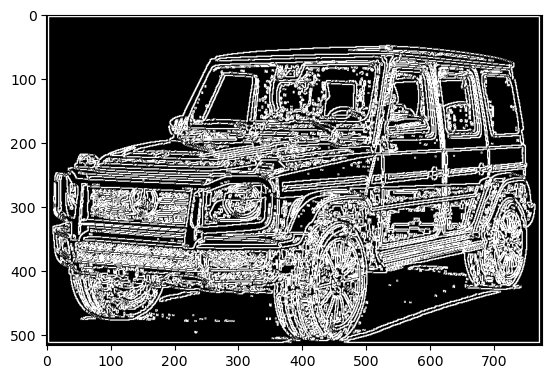

In [ ]:
PATH = 'imgs\Class_G.jpg'
img = Image.open(PATH)
laplacian_of_gauss = Edge_Detection(img)
laplacian_of_gauss.perform_edge_detection()